# Support Vector Machine Classification


## 目的
利用 gradient descent 最大化margin 分出兩類  


## What are some use cases for SVMs?

-Classification, regression (time series prediction, etc) , outlier detection, clustering

## 其他例子

- Learning to use Scikit-learn's SVM function to classify images https://github.com/ksopyla/svm_mnist_digit_classification
- Pulse classification, more useful dataset 
https://github.com/akasantony/pulse-classification-svm
 
 
## Whats a hyperplane?

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")
 
![](stata_svm_python.files/pointtoline.png)
![](stata_svm_python.files/最大化margin.png)

## Let's define our loss function (what to minimize) and our objective function (what to optimize)

#### Loss function

We'll use the Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

$$
c(x,y,f(x))=(1-y*f(x))_+
$$

- c is the loss function, 
- x the sample, 
- y is the true label, 
- f(x) the predicted label.


$$
c(x,y,f(x)) =  \bigg\{ \begin{array}{lr} 0, &  \text{if } y*f(x)\ge 1 \\ 1-y*f(x), & else \end{array}
$$


#### Objective Function


$$
min_w\lambda \|w\|^2+\Sigma_{i=1}^n (1-y_i\langle x_i,w \rangle)_+
$$
目標方程有兩項目 
- 一個是用來增加margin
- 一個是分類錯誤的逞罰

## 最佳化

$$
\frac{\delta}{\delta w_k}\lambda \|w\|^2 = 2\lambda w_k
$$
$$
\frac{\delta}{\delta w_k}(1-y_i\langle x_i,w \rangle)_+ =  \bigg\{ \begin{array}{lr} 0, &  \text{if } y_i\langle x_i,w \rangle\ge 1 \\ -y_i*x_{ik}, & else \end{array}

$$
 

Misclassification condition 

$$ 
y_i \langle x_i,w\rangle < 1 
$$

Update rule for our weights (misclassified)

$$ 
w=w+\eta(y_i x_i - 2\lambda w) 
$$


{{< notice type="info" class="" >}}
including the learning rate η and the regularizer λ
The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.
- Learning rate too high? The algorithm might overshoot the optimal point.
- Learning rate too low? Could take too long to converge. Or never converge.

As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.

The regularizer(1/epochs) controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. 
- Regularizer too high? overfit (large testing error) 
- Regularizer too low? underfit (large training error) 

{{< /notice >}}


Update rule for our weights (correctly classified)
$$
w=w+\eta(-2\lambda w) 
$$

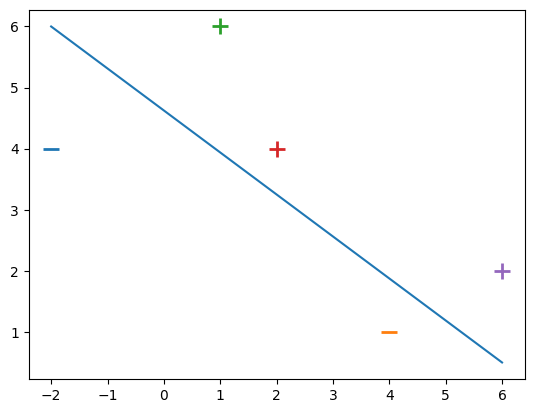

In [44]:
#產生範例資料
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

In [45]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    sz=len(Y)
    #w=np.zeros(X.shape[1])
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    #plt.plot(errors, '|')
    #plt.ylim(0.5,1.5)
    #plt.axes().set_yticklabels([])
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

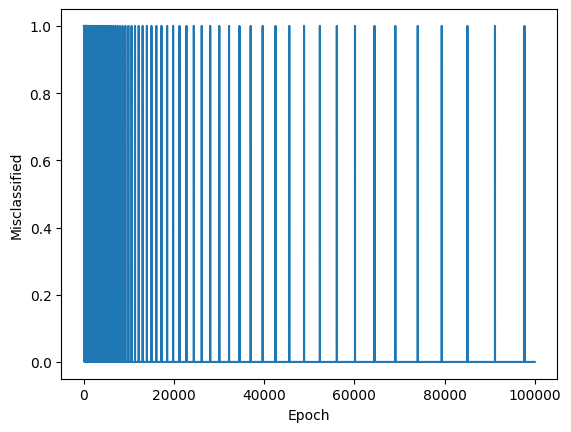

array([ 1.58876117,  3.17458055, 11.11863105])

In [46]:
w = svm_sgd_plot(X,y)
w
#they decrease over time! Our SVM is learning the optimal hyperplane

[[ 1.58876117  3.17458055 -3.17458055  1.58876117]
 [ 1.58876117  3.17458055  3.17458055 -1.58876117]]
(np.float64(1.5887611677029299), np.float64(1.5887611677029299))
(np.float64(3.174580551480781), np.float64(3.174580551480781))
(np.float64(-3.174580551480781), np.float64(3.174580551480781))
(np.float64(1.5887611677029299), np.float64(-1.5887611677029299))


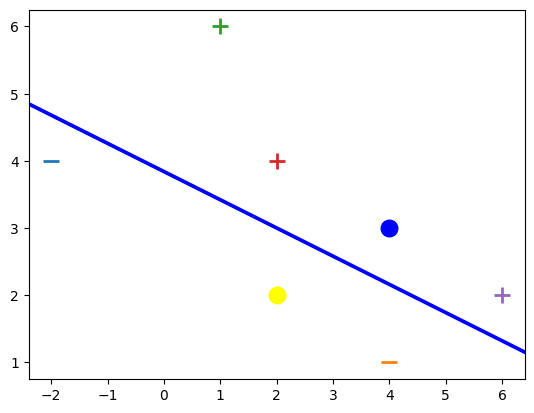

In [47]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='o', linewidths=2, color='yellow')# -
plt.scatter(4,3, s=120, marker='o', linewidths=2, color='blue')# +

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
print(x2x3)
aX,aY,aU,aV = zip(*x2x3)
print(aX)
print(aY)
print(aU)
print(aV)
ax = plt.gca()
ax.quiver(aX,aY,aU,aV,scale=1, color='blue')

In [48]:
np.min(X,0)[0:2]

array([-2,  1])

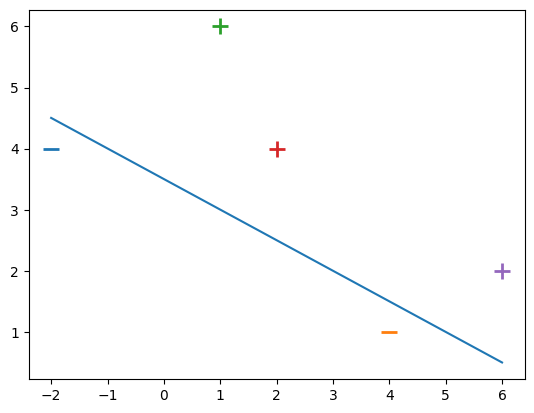

In [49]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
def ybyx(ax):
    #ax*w[0]+ay*w[1]+w[2]=0
    ay=-(ax*w[0]-w[2])/w[1]
    return ay
min2=np.min(X,0)[0:2]
max2=np.max(X,0)[0:2]
px=[min2[0],max2[0]]
py=[]
for d,v in enumerate(px):
    py.append(ybyx(v))
plt.plot(px,py)
plt.show()

 

In [50]:
print(np.dot([2,2,-1],w))
print(np.dot([4,3,-1],w))

-1.591947610537563
4.760155276349076


[多個分類](https://www.baeldung.com/cs/svm-multiclass-classification)